In [1]:
import pandas as pd

df = pd.read_csv("./classification.csv")

# If you remove a few columns from the data in advance.
# df = df.drop("column name", axis = 1)

# If you convert a categorical variable into multiple columns
# you can do that with the following code:
# df = pd.get_dummies(df, columns = ["column name"])

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [2]:
from sklearn.model_selection import train_test_split

# Which columns should be used for prediction
X = df[["age", "interest"]].values

# Or: The column "success" should not be used for prediction:
# X = df.drop("success", axis = 1).values

y = df["success"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.25)

In [3]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#scaler.fit(X_train)

#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [4]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(criterion = "entropy")
model.fit(X_train, y_train)

# Y = 0, 1

print(model.score(X_test, y_test))

0.9466666666666667


In [12]:
from sklearn.tree import export_graphviz

tree = export_graphviz(model, None, 
                       feature_names = ["age", "interest"], 
                       class_names=["didn't buy", "bought"],
                       rounded = True,
                      filled=True)

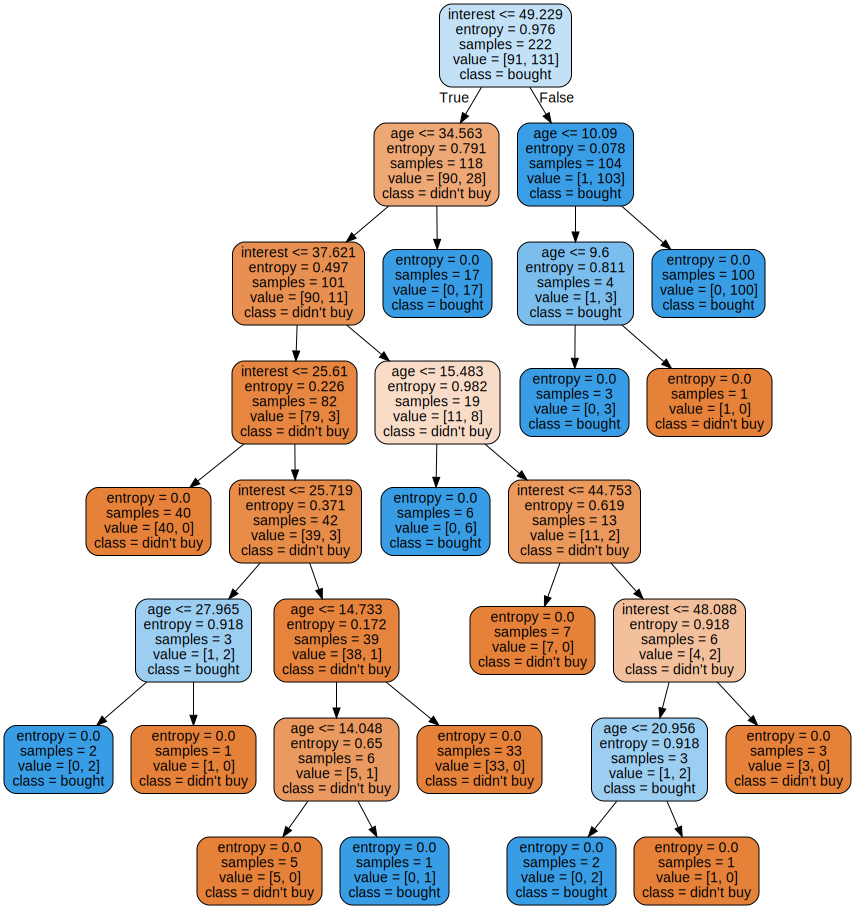

In [13]:
import graphviz

graphviz.Source(tree)

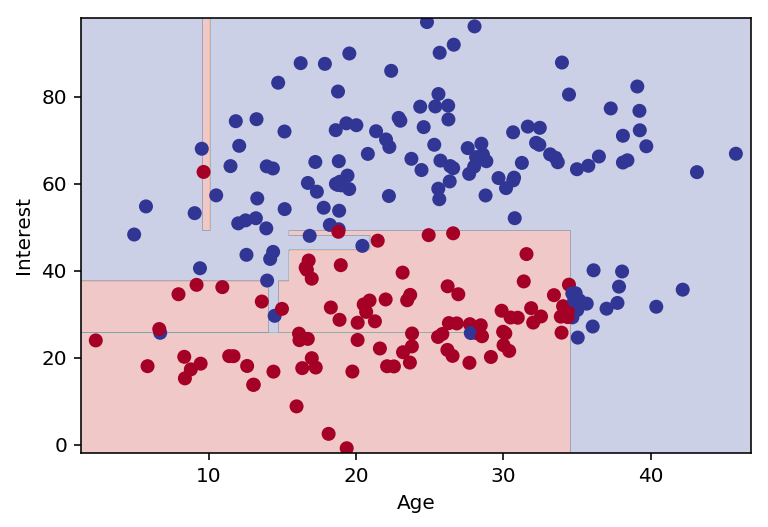

In [9]:
# Note: For this command to work, the 
# "helper.py" - file is in the same folder as the
# current Jupyter Notebook

from helper import plot_classifier

# Plot training data
plot_classifier(model, X_train, y_train, proba = False, xlabel = "Age", ylabel = "Interest")